# 牛刀小试——足球运动员分析
## 背景信息
当前，足球运动是最受欢迎的运动之一（也可以说没有之一）。在此万受瞩目的运动下，我们打算针对足球运动员个人的信息，技能水平等各项指标进行相关的分析与统计。例如，我们可能会关注如下的内容：
* 足球运动员是否受出生日期的影响？
* 左撇子适合踢足球吗？
* 足球运动员的号码是否与位置相关？
* 足球运动员的年龄与能力具有怎样的关联？
* 哪些技能会对足球运动员的综合能力造成较大的影响？

![图像无法显示](./imgs/football.jpg "足球运动")

## 任务说明
目前，我们收集到了2019年现役运动员的数据集。我们希望通过该数据集，针对众多的足球运动员进行分析与统计，从而能够发现一些关于足球运动员的特征，解开之前的谜题。

## 数据集描述
数据集包含的是2019年现役的足球运动员。

### 列名含义

列名 | 含义  
-|-
Name | 球员姓名
Age | 年龄
Nationality | 国籍
Overall | 综合能力评分
Potential | 潜能评分
Club | 所属俱乐部
Value | 球员身价
Wage | 周薪
Preferred Foot | 惯用脚
Position | 最佳位置
Jersey Number | 运动衫号码
Joined | 加入俱乐部时间
Height | 身高
Weight | 体重
Crossing | 传中
Finishing | 射术
HeadingAccuracy | 头球精度
ShortPassing | 短传
Volleys | 凌空
Dribbling | 盘带
Curve | 弧线
FKAccuracy | 任意球精度
LongPassing | 长传
BallControl | 控球
Acceleration | 加速
SprintSpeed | 速度
Agility | 敏捷
Reactions | 反应
Balance | 平衡
ShotPower | 射门力量
Jumping | 弹跳
Stamina | 体能
Strength | 强壮
LongShots | 远射
Aggression | 侵略性
Interceptions | 拦截意识
Positioning | 跑位
Vision | 视野
Penalties | 点球
Composure | 沉着
Marking | 盯人
StandingTackle | 抢断
SlidingTackle | 铲球
GKDiving | 鱼跃
GKHandling | 手形
GKKicking | 开球
GKPositioning | 站位
GKReflexes | 反应
Release Clause | 违约金

### 场上位置

场上位置如下图所示（图片来自互联网）。

![图像无法显示](./imgs/position.jpg "足球场上位置")

# 数据分析

## 概念
数据分析是指用适当的方法与工具，对收集来的大量数据进行分析，提取其中有意义的信息，从而形成有价值的结论的过程。

## 基本流程
在进行数据分析之前，我们需要清楚数据分析的基本流程。

* 明确需求与目的
* 数据收集
    + 内部数据
    + 购买数据
    + 爬取数据
    + 调查问卷
* 数据预处理
    + 数据清洗
        - 缺失值
        - 异常值
        - 重复值
    + 数据转换
* 数据分析
    + 数据建模
    + 数据可视化
* 编写报告

## 理解流程
我们可以进行一个类比，比如，我们现在要做出一道菜肴，那我们需要进行怎样的流程呢？
* 确定做菜
* 买菜
* 洗菜
* 切菜
* 炒菜
* 盛菜
* 写日记

接下来，我们就可以将做菜的流程步骤去对应理解数据分析的步骤。

做菜步骤 | 数据分析步骤  
-|-
确定做菜 | 明确需求与目的
买菜 | 数据收集
洗菜 | 数据清洗
切菜 | 数据转换
炒菜 | 数据分析
盛菜 | 数据可视化
写日记 | 编写报告

# 程序实现
## 导入相关的库
导入需要的库，同时，进行一些初始化的设置。

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

# mpl.rcParams["font.family"] = "SimHei"
# mpl.rcParams["axes.unicode_minus"] = False

import seaborn as sns
sns.set(style="darkgrid", font="SimHei", font_scale=1.5, rc={"axes.unicode_minus": False})
warnings.filterwarnings("ignore")

## 加载相关的数据集
* 加载相关的数据集。
* 可以使用head / tail / sample查看数据的大致情况。

In [11]:
# 读取参数指定的文件，返回一个DataFrame类型的对象。
data = pd.read_csv("data.csv")
print(data.shape)  # 数据形状 多少行，多少列
data.head(3) # 前3条，默认前5条
#data.tail() #  后5条，默认后5条
#data.sample(2)  # 随机抽样2条，默认1条

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


不过，数据集中的列，并非都是我们分析所需要的，我们可以有选择性的进行加载，只加载我们需要的信息列（特征列）。

In [29]:
columns = ["Name", "Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage", "Preferred Foot",
          "Position", "Jersey Number", "Joined", "Height", "Weight", "Crossing", "Finishing",
          "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing",
          "BallControl", "Acceleration", "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower", 
          "Jumping", "Stamina", "Strength", "LongShots", "Aggression", "Interceptions", "Positioning", "Vision",
          "Penalties", "Composure", "Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling",
          "GKKicking", "GKPositioning", "GKReflexes", "Release Clause"]
# 参数指定所要读取的列。
data = pd.read_csv("data.csv", usecols=columns)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,10.0,"Aug 3, 2017",5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,GK,1.0,"Jul 1, 2011",6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,RCM,7.0,"Aug 30, 2015",5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


上面可以看到列数没有展示全，有省略，如果想要展示所有的列，可以使用 pd.set_option('max_columns',100)

In [30]:
# 设置显示的最大列数。
pd.set_option("max_columns", 100)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,10.0,"Aug 3, 2017",5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,GK,1.0,"Jul 1, 2011",6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,RCM,7.0,"Aug 30, 2015",5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## 数据清洗
### 缺失值处理

* 方法一：通过info查看数据信息。
* 方法二：可以通过isnull与sum结合，查看缺失值情况。


- axis
   - axis = 0 表示行
   - axis = 1 表示列

axis = 0就像是X轴跨行上下移动，而axis = 1就好比Y轴跨列左右移动, 删除一整列，可以想象成Y轴水平移动一格，抹除掉一整列。

In [34]:
# info方法可以显示每列名称，非空值数量，每列的数据类型，内存占用等信息。
# data.info()
# data.isnull() # 结果True/False的表格
data.isnull().sum(axis=0) # 统计每列中带 True 的行数

Name                  0
Age                   0
Nationality           0
Overall               0
Potential             0
Club                241
Value                 0
Wage                  0
Preferred Foot       48
Position             60
Jersey Number        60
Joined             1553
Height               48
Weight               48
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower            48
Jumping              48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Composure            48
Marking              48
StandingTackle  

In [35]:
# 删除所有含有空值的行。就地修改。
data.dropna(axis=0, inplace=True)
data.isnull().sum()

Name               0
Age                0
Nationality        0
Overall            0
Potential          0
Club               0
Value              0
Wage               0
Preferred Foot     0
Position           0
Jersey Number      0
Joined             0
Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes   

### 异常值处理
* 通过describe查看数值信息。
   - describe()返回基本数据信息
   - describe(include=[np.number])只统计数值类型
   - describe()中没有任何参数时，会默认只统计数值类型的字段内容，包括：计数，平均数，方差，最小值，最大值，四分位数，若其中有字符串数据会报错

* 可配合箱线图辅助。
* 异常值可以删除，视为缺失值，或者不处理。

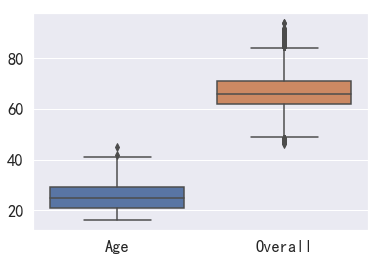

In [37]:
data.describe()
sns.boxplot(data=data[["Age", "Overall"]])

#离群点：小于q1 - 1.5IQR   大于q3 + 1.5IQR
# IQR: q1与q3的差距

### 重复值处理
* 使用duplicate检查重复值。可配合keep参数进行调整。
* 使用drop_duplicate删除重复值。

In [13]:
data.duplicated().sum()
# data.drop_duplicates(inplace=True) 

0

## 数据分析

### 足球运动员的身高体重分布。

#### 数据转换

我们要统计身高与体重的分布情况，不过，身高与体重目前并不是数值类型，我们需要进行转换后，才能进行统计计算。这里，我们将身高与体重转换成熟悉的单位。  
1英尺 = 30.48厘米  
1英寸 = 2.54厘米  
1磅 = 0.45千克

In [38]:
# 定义转换函数
def tran_height(height):
    v = height.split("'")
    return int(v[0]) * 30.48 + int(v[1]) * 2.54

def tran_weight(weight):
    v = int(weight.replace("lbs", ""))
    return v * 0.45

data["Height"] = data["Height"].apply(tran_height)
data["Weight"] = data["Weight"].apply(tran_weight)

In [39]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",170.18,71.55,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",187.96,82.35,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,10.0,"Aug 3, 2017",175.26,67.50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,GK,1.0,"Jul 1, 2011",193.04,75.60,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,RCM,7.0,"Aug 30, 2015",180.34,69.30,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### 绘制核密度图
数据转换后，我们可以来绘制下身高与体重的分布。

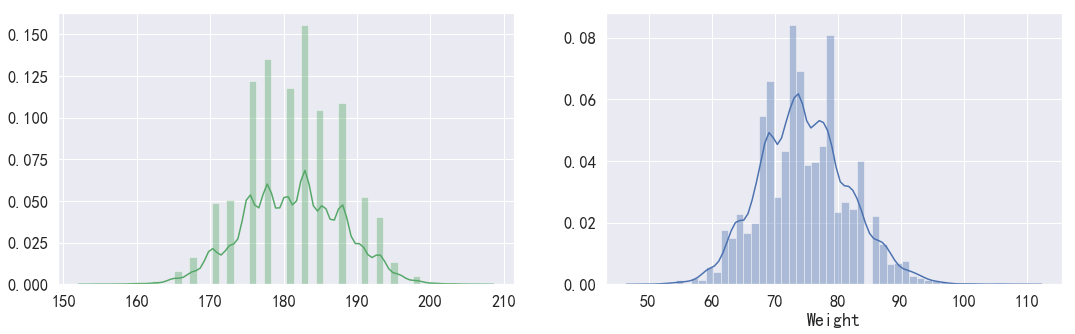

In [40]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((18, 5))
sns.distplot(data[["Height"]], bins=50, ax=ax[0], color="g")
sns.distplot(data["Weight"], bins=50, ax=ax[1])

### 左撇子适合踢足球吗？

#### 数量上对比
我们首先从球员数量上进行一下统计。

Right    12823
Left      3820
Name: Preferred Foot, dtype: int64


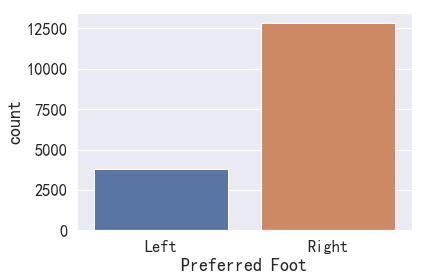

In [17]:
number = data["Preferred Foot"].value_counts()
print(number)
sns.countplot(x="Preferred Foot", data=data)

#### 能力上对比
然后，我们再从球员综合能力上进行衡量。

Preferred Foot
Left     66.740838
Right    65.990564
Name: Overall, dtype: float64


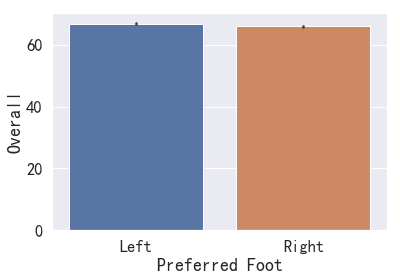

In [18]:
print(data.groupby("Preferred Foot")["Overall"].mean())
sns.barplot(x="Preferred Foot", y="Overall", data=data)

#### 位置上对比
由于在综合能力上体现不明显，我们现在通过每个位置，进行更细致的分析。为了分析的客观性，我们只统计左脚与右脚都超过50人（含50人）的位置。  
首先，我们来计算哪些位置左右脚球员都达到了50人。

In [22]:
t = data.groupby(["Preferred Foot", "Position"]).size()
t = t.unstack()
t[t < 50] = np.NaN
t.dropna(axis=1, inplace=True)
display(t)

Position,CAM,CB,CDM,CM,GK,LB,LCB,LCM,LM,LW,RM,RW,ST
Preferred Foot,,,,,,,,,,,,,
Left,232,313,117,226,193,1071,244,86,372,98,220,79,256
Right,645,1333,756,1050,1707,152,351,267,640,240,802,246,1668


然后，我们根据之前计算的那些位置，对数据集进行过滤。

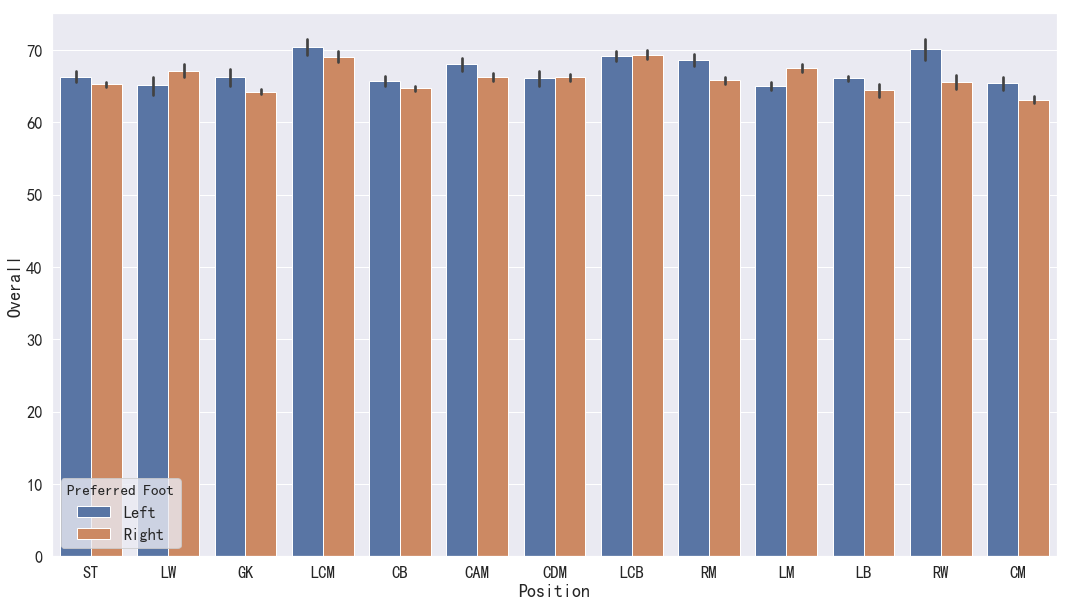

In [23]:
t2 = data[data["Position"].isin(t.columns)]
plt.figure(figsize=(18, 10))
sns.barplot(x="Position", y="Overall", hue="Preferred Foot", hue_order=["Left", "Right"], data=t2)

从结果可以清晰得知，左脚选手更适合RW(右边锋）的位置。

### 哪个的俱乐部 / 国家拥有综合能力更好的球员（top10）。
由于每个俱乐部/国家队人数不一，为了统计的客观性，只考虑人数达到一定规模的俱乐部/国家。

#### 俱乐部

,mean,count
Club,,
Juventus,82.280000,25
Napoli,80.041667,24
Inter,79.619048,21
Real Madrid,78.242424,33
FC Barcelona,78.030303,33
Milan,77.541667,24
Paris Saint-Germain,77.433333,30
Roma,77.400000,25
Manchester United,77.242424,33


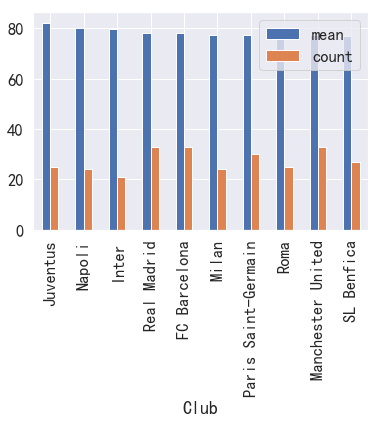

In [27]:
g = data.groupby("Club")
r = g["Overall"].agg(["mean", "count"])
r = r[r["count"] >= 20]
r = r.sort_values("mean", ascending=False).head(10)
display(r)
r.plot(kind="bar")

#### 国家队

,mean,count
Nationality,,
Portugal,71.406897,290
Brazil,71.251269,788
Uruguay,70.443609,133
Algeria,70.392857,56
Ukraine,70.347222,72
Spain,69.733060,974
Morocco,69.721519,79
Serbia,69.612069,116
Czech Republic,69.548387,93


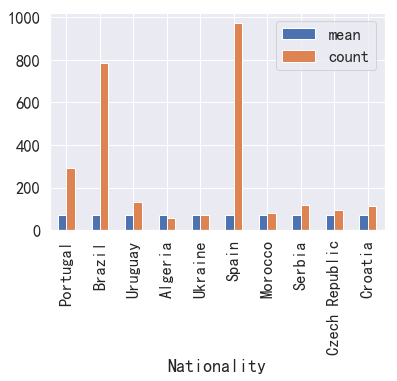

In [28]:
g = data.groupby("Nationality")
r = g["Overall"].agg(["mean", "count"])
r = r[r["count"] >= 50]
r = r.sort_values("mean", ascending=False).head(10)
display(r)
r.plot(kind="bar")

### 哪个俱乐部拥有效力更久的球员（5年及以上）？

In [29]:
t = pd.to_datetime(data["Joined"])
t = t.astype(np.str)

In [30]:
t[0]

'2004-07-01'

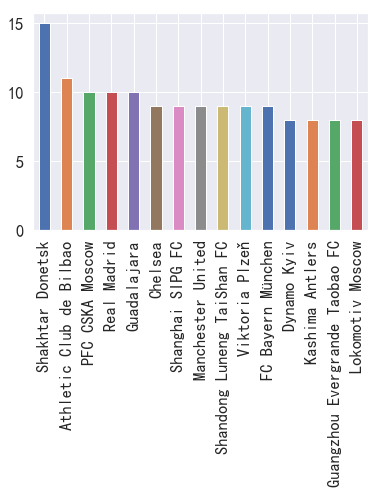

In [32]:
join_year = t.apply(lambda item: int(item.split("-")[0]))
over_five_year = (2018 - join_year) >= 5
t2 = data[over_five_year]
t2 = t2["Club"].value_counts()
# display(t2)
t2.iloc[:15].plot(kind="bar")

### 足球运动员是否是出生日期相关？
我们现有的数据集中，不含有具体的出生日期，因此，我们使用另外一个数据集，该数据集包含2018年世界杯所有球员。

In [33]:
data2 = pd.read_csv("wc2018-players.csv")
data2.head()

,Team,#,Pos.,FIFA Popular Name,Birth Date,Shirt Name,Club,Height,Weight
0,Argentina,3,DF,TAGLIAFICO Nicolas,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
1,Argentina,22,MF,PAVON Cristian,21.01.1996,PAVÓN,CA Boca Juniors (ARG),169,65
2,Argentina,15,MF,LANZINI Manuel,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
3,Argentina,18,DF,SALVIO Eduardo,13.07.1990,SALVIO,SL Benfica (POR),167,69
4,Argentina,10,FW,MESSI Lionel,24.06.1987,MESSI,FC Barcelona (ESP),170,72


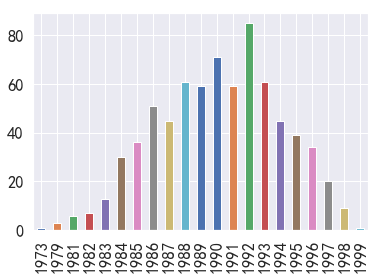

In [38]:
t = data2["Birth Date"].str.split(".", expand=True)
# t
# t[0].value_counts().plot(kind="bar")
# t[1].value_counts().plot(kind="bar")
# t[2].value_counts().plot(kind="bar")
t[2].value_counts().sort_index().plot(kind="bar")

### 足球运动员号码是否与位置相关？

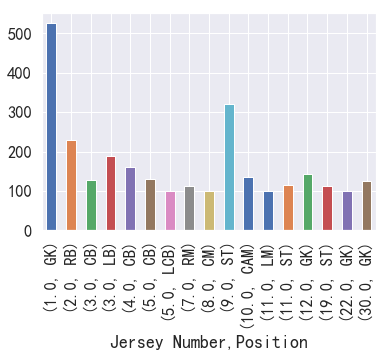

In [41]:
g = data.groupby(["Jersey Number", "Position"])
t = g.size()
# display(t)
t = t[t >= 100]
t.plot(kind="bar")

### 身价与薪水，违约金是否相关？
因为身价与违约金的单位既有M，也有K，我们统一K单位，同时，将类型转换为数值类型，便于统计。

In [42]:
def to_numeric(item):
    item = item.replace("€", "")
    value = float(item[:-1])
    if item[-1] == "M":
        value *= 1000
    return value

data["Value"] = data["Value"].apply(to_numeric)
data["Wage"] = data["Wage"].apply(to_numeric)
data["Release Clause"] = data["Release Clause"].apply(to_numeric)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,RF,10.0,"Jul 1, 2004",170.18,71.55,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,ST,7.0,"Jul 10, 2018",187.96,82.35,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,LW,10.0,"Aug 3, 2017",175.26,67.50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,GK,1.0,"Jul 1, 2011",193.04,75.60,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,RCM,7.0,"Aug 30, 2015",180.34,69.30,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


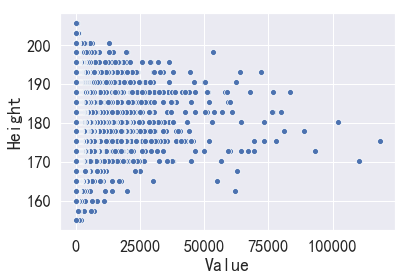

In [45]:
# sns.scatterplot(x="Value", y="Wage", data=data)
# sns.scatterplot(x="Value", y="Release Clause", data=data)
sns.scatterplot(x="Value", y="Height", data=data)

### 哪些指标对综合评分的影响较大？

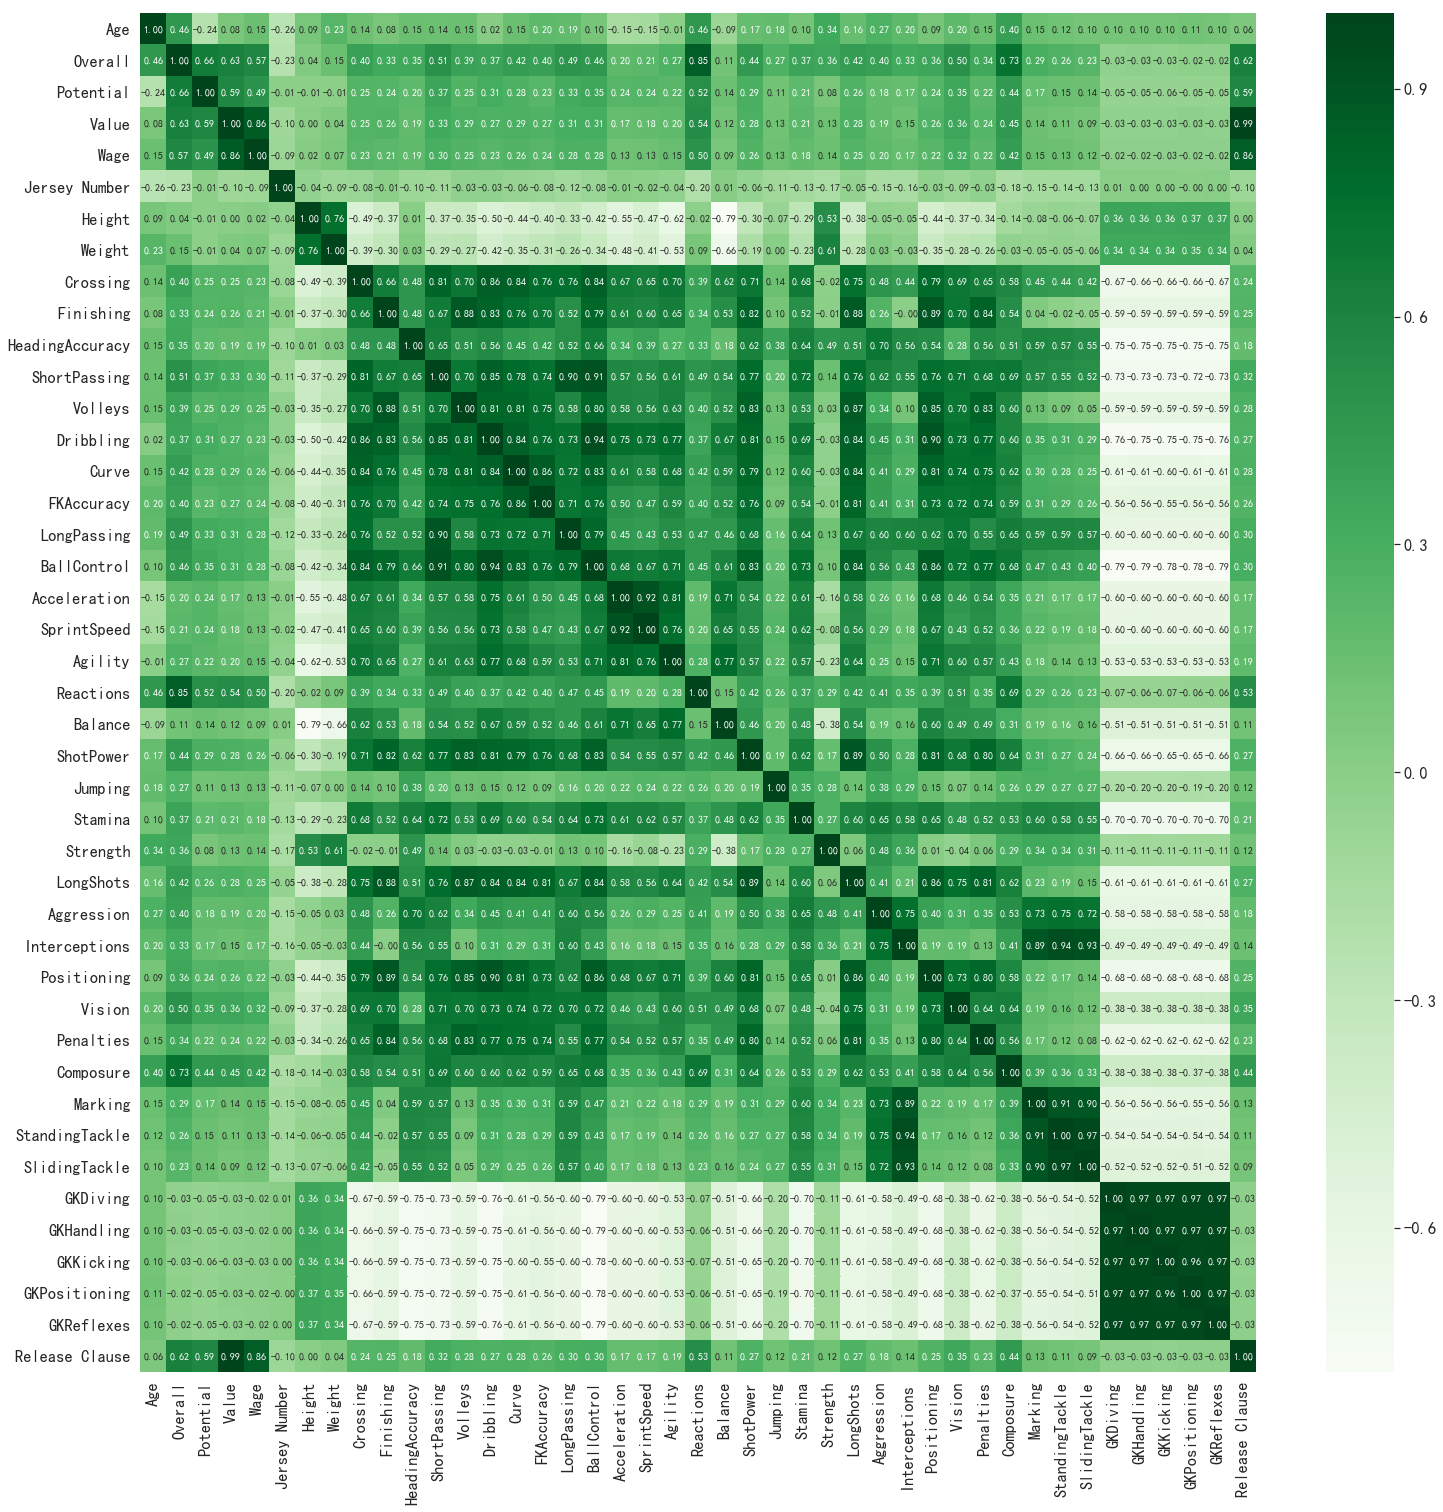

In [47]:
# data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap=plt.cm.Greens)
plt.savefig("corr.png", dpi=100, bbox_inches="tight")

### 分析某项未标记的技能
假设因为某种原因，GKDiving列的标题没有成功获取，现在分析该技能可能表示的含义。

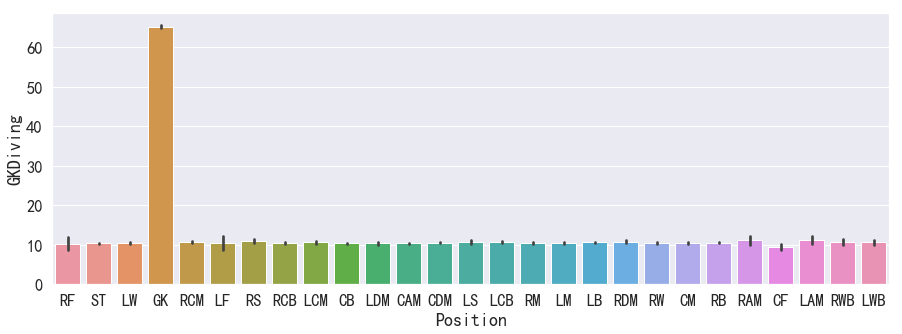

In [48]:
g = data.groupby("Position")
g["GKDiving"].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x="Position", y="GKDiving", data=data)

### 年龄与评分具有怎样的关系？

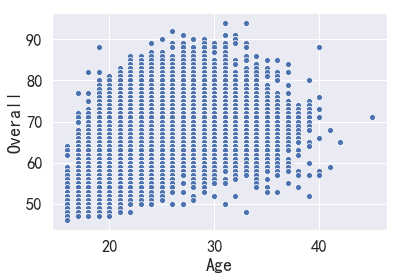

In [49]:
sns.scatterplot(x="Age", y="Overall", data=data)

In [50]:
data["Age"].corr(data["Overall"])

0.4649770139274187

Age
弱冠之年    59.356556
而立之年    67.311281
不惑之年    69.374342
知天命     65.750000
Name: Overall, dtype: float64

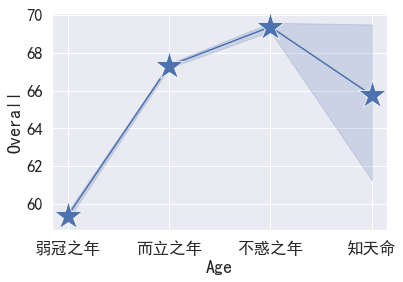

In [53]:
# 对一个数组进行切分，可以将连续值变成离散值。
# bins 指定区间数量（桶数）。bins如果为int类型，则进行等分。
# 此处的区间边界与为前开后闭。
# pd.cut(t["Age"], bins=4)
# 如果需要进行区间的不等分，则可以将bins参数指定为数组类型。
# 数组来指定区间的边界。
min_, max_ = data["Age"].min() - 0.5, data["Age"].max()
# pd.cut(t["Age"], bins=[min_, 20, 30, 40, max_])
# pd.cut 默认显示的内容为区间的范围，如果我们希望自定义内容(每个区间显示的内容)，可以通过labels参数
# 进行指定。
t = pd.cut(data["Age"], bins=[min_, 20, 30, 40, max_], labels=["弱冠之年", "而立之年","不惑之年", "知天命"])

t = pd.concat((t, data["Overall"]), axis=1)
# display(t)
g = t.groupby("Age")
display(g["Overall"].mean())
sns.lineplot(y="Overall", marker="*", ms=30, x="Age", data=t)

## 总结
1. 左撇子相对于右撇子来说，并无明显劣势，其更适合右边锋的位置。
2. 知名俱乐部平均能力更好的球员，但并非球员平均能力越好，球队的成绩就越好。
3. 一些知名足球国家，在球员的平均能力上可能并没有非常靠前，只是因为足球运动员较多，进而个别球员较知名而已。
4. 足球运动员与出生日期是有关的，在年初出生的运动员要明显多于在年末出生的运动员。
5. 足球运动员的号码与位置是相关的，例如，1号通常都是守门员，9号通常是中锋等。
6. 足球运动员的身价与其薪水是紧密关联的，尤其是违约金，与身价的关联更大。
7. Reactions（反应）与Composure（沉着）两项技能对总分的影响最大。
8. 随着年龄的增长，球员得到更多的锻炼与经验，总体能力提升，但三十几岁之后，由于体力限制，总体能力下降。